In [101]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as mtp 
import plotly.express as px 
from scipy import stats
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from tensorflow import keras

In [102]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [103]:
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [104]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB
None


In [105]:
print(data.describe())

               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


In [106]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [107]:
city_no = data['City'].value_counts()

fig = px.pie(values=city_no, names=city_no.index, title='Pie Chart City',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig2 = px.histogram(data, x='City', title='City Distribution Histogram' ,
                    color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()
fig2.show()

In [108]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [109]:
data = data.drop(['Posted On' , 'Point of Contact' , 'Floor'] , axis = 1)

In [110]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


In [111]:
area_localities_per_city = data.groupby('City')['Area Locality'].nunique()
print(area_localities_per_city)



City
Bangalore    429
Chennai      323
Delhi        289
Hyderabad    343
Kolkata      252
Mumbai       604
Name: Area Locality, dtype: int64


In [112]:
data['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [113]:
data['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [114]:
data['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [115]:
pd.get_dummies(data, columns=['City'], prefix='City')

,BHK,Rent,Size,Area Type,Area Locality,Furnishing Status,Tenant Preferred,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,Super Area,Bandel,Unfurnished,Bachelors/Family,2,0,0,0,0,1,0
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Semi-Furnished,Bachelors/Family,1,0,0,0,0,1,0
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Semi-Furnished,Bachelors/Family,1,0,0,0,0,1,0
3,2,10000,800,Super Area,Dumdum Park,Unfurnished,Bachelors/Family,1,0,0,0,0,1,0
4,2,7500,850,Carpet Area,South Dum Dum,Unfurnished,Bachelors,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Semi-Furnished,Bachelors/Family,2,0,0,0,1,0,0
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Semi-Furnished,Bachelors/Family,3,0,0,0,1,0,0
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Semi-Furnished,Bachelors/Family,3,0,0,0,1,0,0
4744,3,45000,1500,Carpet Area,Gachibowli,Semi-Furnished,Family,2,0,0,0,1,0,0


In [116]:
avg_rent = [data['Rent'].loc[data['City']==i].sum()/data['Rent'].loc[data['City']==i].shape[0] for i in data['City'].unique().tolist()]
px.bar(x=data['City'].unique().tolist(), y=avg_rent, color=avg_rent, color_continuous_scale='jet',text_auto = True)

In [117]:
label_encoder = LabelEncoder()

In [118]:
embedded_FS = label_encoder.fit_transform(data['Furnishing Status'])

In [119]:
embedded_FS

array([2, 1, 1, ..., 1, 1, 2])

In [120]:
furnishing_mapping = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 3}
data['Furnishing Status'] = data['Furnishing Status'].map(furnishing_mapping)


In [121]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Bandel,Kolkata,0,Bachelors/Family,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,Bachelors/Family,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,1,Bachelors/Family,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,0,Bachelors/Family,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,0,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,1,Bachelors/Family,2
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,1,Bachelors/Family,3
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,1,Bachelors/Family,3
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,1,Family,2


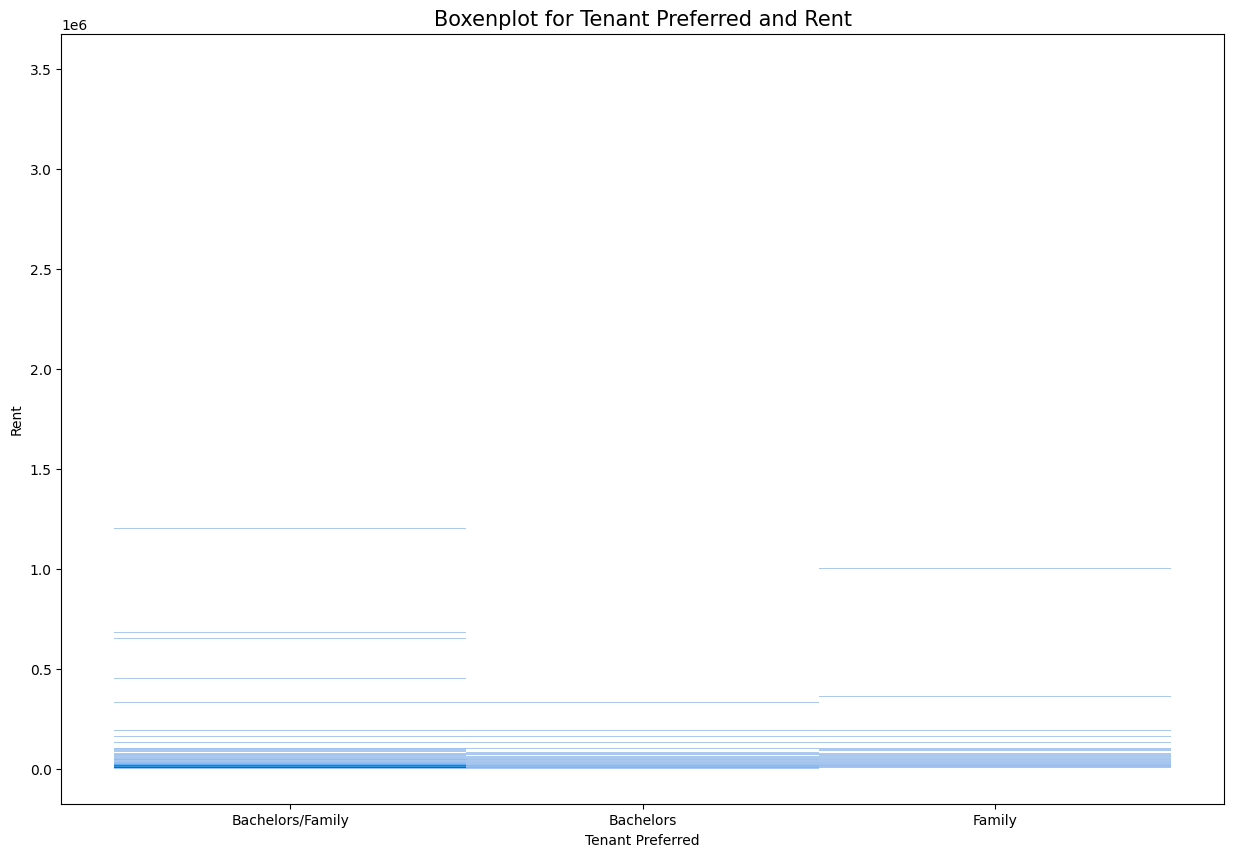

In [122]:
fig,axes = mtp.subplots(figsize=(15,10))
sns.histplot(x="Tenant Preferred", y='Rent',data=data)
mtp.title('Boxenplot for Tenant Preferred and Rent',fontsize=15)
mtp.show()

In [123]:
data['Tenant Binary'] = data['Tenant Preferred'].map({'Bachelors/Family':1 , 'Bachelors': 0, 'Family': 3})



In [124]:
# Calculate point-biserial correlation coefficient
point_biserial_corr, p_value = stats.pointbiserialr(data['Tenant Binary'], data['Rent'])
print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.029428956346589277
P-value: 0.04263156913983583


THus as the Coeeficient is close to 0 their is no linear realtionsip beweem them 

In [125]:
data = data.drop(['Tenant Preferred' , 'Tenant Binary'],axis =1)

In [126]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,10000,1100,Super Area,Bandel,Kolkata,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,1,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,0,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,0,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,1,2
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,1,3
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,1,3
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,1,2


In [127]:


# Perform ANOVA
anova_result = stats.f_oneway(data[data['Area Type'] == 'Super Area']['Rent'],
                        data[data['Area Type'] == 'Carpet Area']['Rent'])

# Print the ANOVA result
print("ANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


ANOVA Result:
F-statistic: 231.36802887198672
p-value: 4.726280417177115e-51


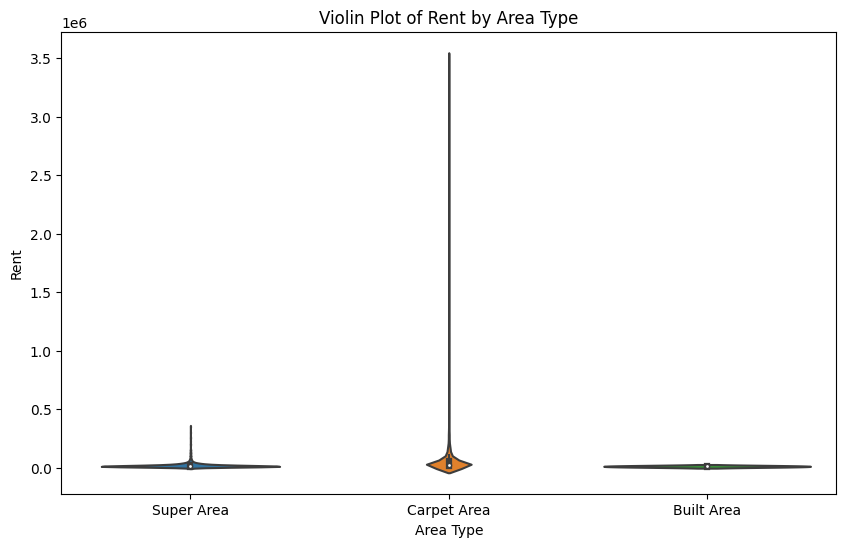

In [128]:
# Violin plot
mtp.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Area Type', y='Rent')
mtp.title('Violin Plot of Rent by Area Type')
mtp.xlabel('Area Type')
mtp.ylabel('Rent')
mtp.show()


In [129]:
# Map 'Area Type' categories to numerical values
data['Area Type'] = data['Area Type'].map({'Carpet Area': 3, 'Super Area': 1, 'Built Area': 0})


In [130]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom
0,2,10000,1100,1,Bandel,Kolkata,0,2
1,2,20000,800,1,"Phool Bagan, Kankurgachi",Kolkata,1,1
2,2,17000,1000,1,Salt Lake City Sector 2,Kolkata,1,1
3,2,10000,800,1,Dumdum Park,Kolkata,0,1
4,2,7500,850,3,South Dum Dum,Kolkata,0,1
...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Bandam Kommu,Hyderabad,1,2
4742,3,29000,2000,1,"Manikonda, Hyderabad",Hyderabad,1,3
4743,3,35000,1750,3,"Himayath Nagar, NH 7",Hyderabad,1,3
4744,3,45000,1500,3,Gachibowli,Hyderabad,1,2


In [131]:
point_biserial_corr, p_value = stats.pointbiserialr(data['Area Type'], data['Rent'])
print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

Point-Biserial Correlation Coefficient: 0.21576763371675337
P-value: 4.135707523973244e-51


In [132]:
onehot_encoder = OneHotEncoder()

city_reshaped = data['City'].values.reshape(-1, 1)
city_encoded = onehot_encoder.fit_transform(city_reshaped)

city_encoded_df = pd.DataFrame(city_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['City']))

# Concatenate the encoded DataFrame with the original DataFrame
data = pd.concat([data, city_encoded_df], axis=1)

# Display the encoded DataFrame
data.head(5)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,1,Bandel,Kolkata,0,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,1,"Phool Bagan, Kankurgachi",Kolkata,1,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,1,Salt Lake City Sector 2,Kolkata,1,1,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,1,Dumdum Park,Kolkata,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,3,South Dum Dum,Kolkata,0,1,0.0,0.0,0.0,0.0,1.0,0.0


/var/folders/ys/f1dtzjmj589424_wn9_wp8t80000gn/T/ipykernel_22882/1382016858.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



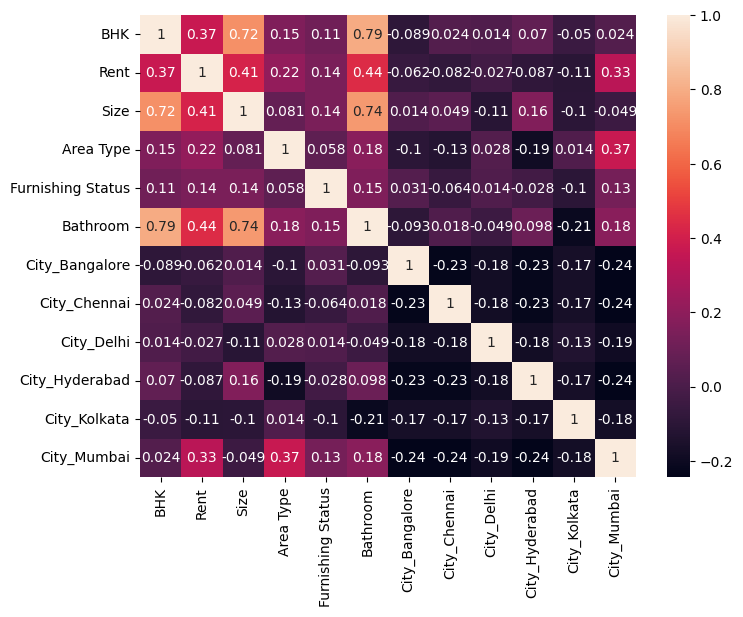

In [133]:
corr = data.corr()
mtp.subplots(figsize=(8,6))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
mtp.show()

In [134]:
X = data.drop(['City' , 'Area Locality','Rent'],axis=1)
y = data['Rent']

In [135]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.3, random_state=43)

In [136]:
X_train

,BHK,Size,Area Type,Furnishing Status,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
1182,4,1432,3,0,3,0.0,0.0,0.0,0.0,0.0,1.0
1926,2,1100,3,1,2,1.0,0.0,0.0,0.0,0.0,0.0
2733,1,450,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0
115,2,1000,3,0,2,0.0,0.0,0.0,0.0,1.0,0.0
4145,3,1800,1,1,3,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
307,3,1200,3,1,2,0.0,0.0,0.0,0.0,1.0,0.0
2064,3,1400,1,1,3,1.0,0.0,0.0,0.0,0.0,0.0
2325,1,100,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0
2303,2,1200,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0


In [137]:
def print_metrics(x,y):
    mae = mean_absolute_error(x, y)
    mse = mean_squared_error(x, y)
    rmse = mean_squared_error(x, y, squared=False)
    r2 = r2_score(x, y)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R^2):", r2)
    return mae , mse , rmse , r2

    

# Linear Regression

In [138]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [139]:
y_pred = lr.predict(X_test)

In [140]:
linear_mae , linear_mse , linear_rmse , linear_r2 = print_metrics(y_test , y_pred)


Mean Absolute Error (MAE): 24233.205242660257
Mean Squared Error (MSE): 10340875904.072924
Root Mean Squared Error (RMSE): 101690.09737468504
R-squared (R^2): 0.19184210529726498


In [141]:
# y_train= y_train.values.reshape(-1,1)
# y_test= y_test.values.reshape(-1,1)


sc_X = StandardScaler()
sc_y = StandardScaler()
scaled_X_train = sc_X.fit_transform(X_train)
scaled_X_test = sc_X.fit_transform(X_test)
scaled_y_train = sc_X.fit_transform(y_train.values.reshape(-1,1))
scaled_y_test = sc_y.fit_transform(y_test.values.reshape(-1,1))

# SVM

In [142]:
scm = SVR(kernel='linear' , C = 1)

In [143]:
scm.fit(X_train , y_train)

SVR(C=1, kernel='linear')

In [144]:
y_pred_2 = scm.predict(X_test)

In [145]:
svr_mae , svr_mse ,svr_rmse ,svr_r2 = print_metrics(y_test , y_pred_2)

Mean Absolute Error (MAE): 25086.098992174335
Mean Squared Error (MSE): 12352842657.142986
Root Mean Squared Error (RMSE): 111143.34283772009
R-squared (R^2): 0.034603315231853005


# RAndom Forest Regressor

In [146]:
rfr = RandomForestRegressor(n_estimators=1000 , random_state=505)

In [147]:
rfr.fit(scaled_X_train , scaled_y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=1000, random_state=505)

In [148]:
y_pred_3 = rfr.predict(scaled_X_test)

In [149]:
rf_mae , rf_mse ,rf_rmse ,rf_r2 = print_metrics(scaled_y_test , y_pred_3)

Mean Absolute Error (MAE): 0.2989485332437325
Mean Squared Error (MSE): 1.0160772345641635
Root Mean Squared Error (RMSE): 1.008006564742593
R-squared (R^2): -0.016077234564163323


# Nueral Network Regressor

In [150]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(scaled_X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  
])
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(scaled_X_train,scaled_y_train, epochs=500, batch_size=64, validation_split=0.2)


Epoch 1/500
42/42 [==============================] - 0s 2ms/step - loss: 0.4465 - val_loss: 0.4892
Epoch 2/500
42/42 [==============================] - 0s 1ms/step - loss: 0.3089 - val_loss: 0.4429
Epoch 3/500
42/42 [==============================] - 0s 1ms/step - loss: 0.2776 - val_loss: 0.4097
Epoch 4/500
42/42 [==============================] - 0s 1ms/step - loss: 0.2550 - val_loss: 0.3910
Epoch 5/500
42/42 [==============================] - 0s 1ms/step - loss: 0.2417 - val_loss: 0.3782
Epoch 6/500
42/42 [==============================] - 0s 1ms/step - loss: 0.2365 - val_loss: 0.3878
Epoch 7/500
42/42 [==============================] - 0s 1ms/step - loss: 0.2191 - val_loss: 0.3949
Epoch 8/500
42/42 [==============================] - 0s 1ms/step - loss: 0.2285 - val_loss: 0.3673
Epoch 9/500
42/42 [==============================] - 0s 1ms/step - loss: 0.2128 - val_loss: 0.3699
Epoch 10/500
42/42 [==============================] - 0s 1ms/step - loss: 0.2148 - val_loss: 0.3731
Epoch 11/

In [151]:
y_pred_4 = model.predict(scaled_X_test)

45/45 [==============================] - 0s 387us/step


In [152]:
nn_mae , nn_mse ,nn_rmse ,nn_r2 = print_metrics(scaled_y_test , y_pred_4)

Mean Absolute Error (MAE): 0.2874663128584336
Mean Squared Error (MSE): 0.9462290504189763
Root Mean Squared Error (RMSE): 0.9727430546752706
R-squared (R^2): 0.0537709495810238


# Lasso

In [153]:
lasso = Lasso(alpha=0.2)

In [154]:
lasso.fit(X_train , y_train)

Lasso(alpha=0.2)

In [155]:
y_pred_5 = lasso.predict(X_test)

In [156]:
lasso_mae ,lasso_mse ,lasso_rmse ,lasso_r2 = print_metrics(y_test , y_pred_5)

Mean Absolute Error (MAE): 24233.084465124586
Mean Squared Error (MSE): 10340882697.148335
Root Mean Squared Error (RMSE): 101690.13077554938
R-squared (R^2): 0.19184157440630623


# Ridge

In [157]:
ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [158]:
y_pred_6 = ridge.predict(X_test)

In [159]:
ridge_mae,ridge_mse,ridge_rmse,ridge_r2 = print_metrics(y_test , y_pred_6)

Mean Absolute Error (MAE): 24232.54075214027
Mean Squared Error (MSE): 10340886572.430044
Root Mean Squared Error (RMSE): 101690.14982991245
R-squared (R^2): 0.19184127154612918


# Gradient Boosting Regressor

In [160]:
gb = GradientBoostingRegressor()

In [161]:
gb.fit(scaled_X_train , scaled_y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor()

In [162]:
y_pred_7 = gb.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names



In [163]:
gb_mae,gb_mse,gb_rmse,gb_r2 = print_metrics(scaled_y_test  , y_pred_7)

Mean Absolute Error (MAE): 8.019788407986916
Mean Squared Error (MSE): 89.36359803893092
Root Mean Squared Error (RMSE): 9.453232147732907
R-squared (R^2): -88.3635980389309


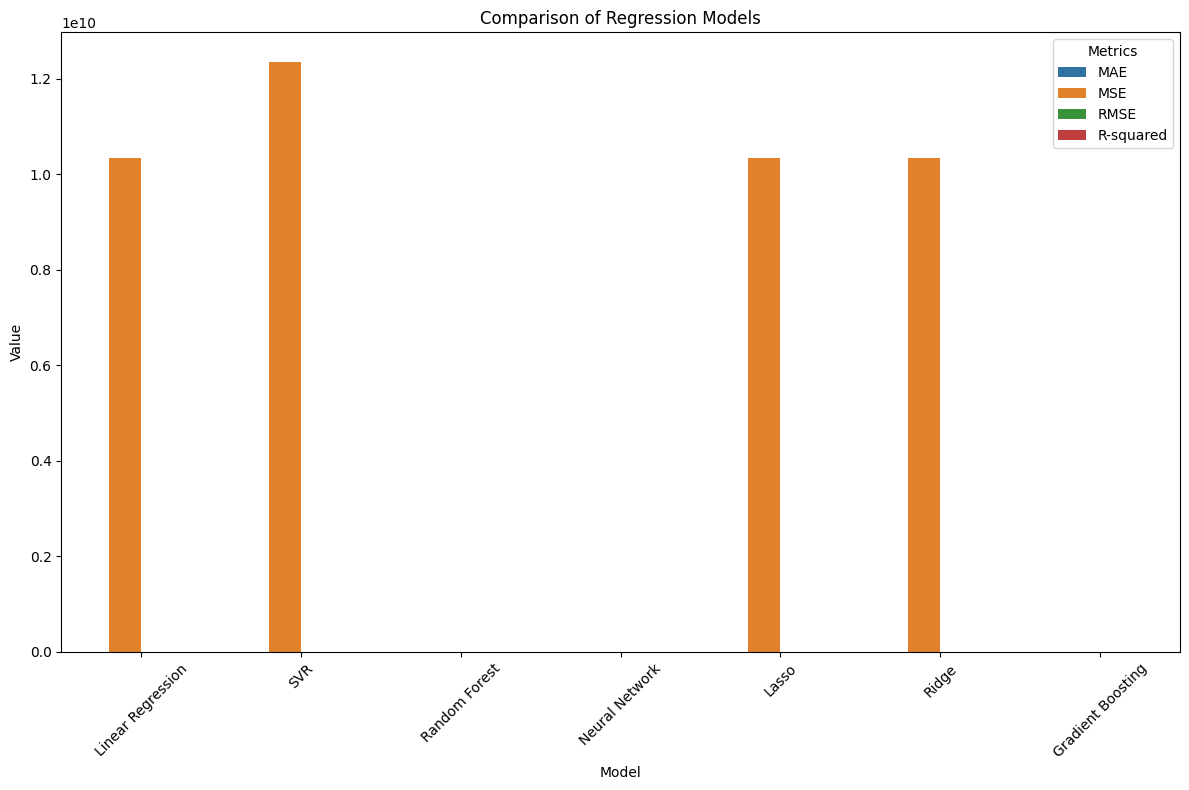

In [164]:


models = ['Linear Regression', 'SVR', 'Random Forest', 'Neural Network', 'Lasso', 'Ridge', 'Gradient Boosting']
mae = [linear_mae, svr_mae, rf_mae, nn_mae, lasso_mae, ridge_mae, gb_mae]
mse = [linear_mse, svr_mse, rf_mse, nn_mse, lasso_mse, ridge_mse, gb_mse]
rmse = [linear_rmse, svr_rmse, rf_rmse, nn_rmse, lasso_rmse, ridge_rmse, gb_rmse]
r2 = [linear_r2, svr_r2, rf_r2, nn_r2, lasso_r2, ridge_r2, gb_r2]


results = pd.DataFrame({'Model': models, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2})

# Melt the DataFrame for easier plotting
results_melted = pd.melt(results, id_vars=['Model'], var_name='Metric', value_name='Value')

# Plot
mtp.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=results_melted)
mtp.title('Comparison of Regression Models')
mtp.xlabel('Model')
mtp.ylabel('Value')
mtp.xticks(rotation=45)
mtp.legend(title='Metrics')
mtp.tight_layout()
mtp.show()


In [165]:
# Define the scale factor
scale_factor = 1000

# Scale the metrics
mae_scaled = [mae_val * scale_factor for mae_val in mae]
mse_scaled = [mse_val * scale_factor for mse_val in mse]
rmse_scaled = [rmse_val * scale_factor for rmse_val in rmse]

# Create a DataFrame
results_df_scaled = pd.DataFrame({
    'Model': models,
    'MAE': mae_scaled,
    'MSE': mse_scaled,
    'RMSE': rmse_scaled,
    'R-squared': r2
})

# Set 'Model' as the index
results_df_scaled.set_index('Model', inplace=True)

print(results_df_scaled)


                            MAE           MSE          RMSE  R-squared
Model                                                                 
Linear Regression  2.423321e+07  1.034088e+13  1.016901e+08   0.191842
SVR                2.508610e+07  1.235284e+13  1.111433e+08   0.034603
Random Forest      2.989485e+02  1.016077e+03  1.008007e+03  -0.016077
Neural Network     2.874663e+02  9.462291e+02  9.727431e+02   0.053771
Lasso              2.423308e+07  1.034088e+13  1.016901e+08   0.191842
Ridge              2.423254e+07  1.034089e+13  1.016901e+08   0.191841
Gradient Boosting  8.019788e+03  8.936360e+04  9.453232e+03 -88.363598


In [166]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Bathroom,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,1,Bandel,Kolkata,0,2,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20000,800,1,"Phool Bagan, Kankurgachi",Kolkata,1,1,0.0,0.0,0.0,0.0,1.0,0.0
2,2,17000,1000,1,Salt Lake City Sector 2,Kolkata,1,1,0.0,0.0,0.0,0.0,1.0,0.0
3,2,10000,800,1,Dumdum Park,Kolkata,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,2,7500,850,3,South Dum Dum,Kolkata,0,1,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,Bandam Kommu,Hyderabad,1,2,0.0,0.0,0.0,1.0,0.0,0.0
4742,3,29000,2000,1,"Manikonda, Hyderabad",Hyderabad,1,3,0.0,0.0,0.0,1.0,0.0,0.0
4743,3,35000,1750,3,"Himayath Nagar, NH 7",Hyderabad,1,3,0.0,0.0,0.0,1.0,0.0,0.0
4744,3,45000,1500,3,Gachibowli,Hyderabad,1,2,0.0,0.0,0.0,1.0,0.0,0.0


In [167]:
def preprocess(l):
    area_type_mapping = {'Carpet Area': 3, 'Super Area': 1, 'Built Area': 0}
    area_type_encoded = area_type_mapping.get(l[2], -1) 
    all_cities = ['Bangalore', 'Delhi', 'Chennai', 'Hyderabad', 'Kolkata', 'Mumbai']
    onehot_encoder = OneHotEncoder(sparse=False , categories=[all_cities])
    city_encoded = onehot_encoder.fit_transform([[l[3]]])  

    furnishing_status_mapping = {'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}
    furnishing_status_encoded = furnishing_status_mapping.get(l[4], -1)
    
    bathroom = int(l[5])
    
    preprocessed_features = [l[0], l[1], area_type_encoded, *city_encoded.flatten(), furnishing_status_encoded, bathroom]
    
    return preprocessed_features


In [171]:
bhk = 2
size = 1000 
area_type = 'Carpet Area'
city = 'Mumbai'
furnishing_Status = 'Furnished'
bath = 1 
l = [bhk , size , area_type , city , furnishing_Status , bath]
predict_rent(l)


[[   2. 1000.    3.    0.    0.    0.    0.    0.    1.    2.    1.]]
1/1 [==============================] - 0s 17ms/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning:

X 

(array([22532.18141528]),
 array([18378.85678086]),
 array([4.85208089]),
 array([[1342.639]], dtype=float32),
 array([-12121.85307369]),
 array([22530.63908039]),
 array([13.03450317]))

In [169]:
def predict_rent(array):
    # Preprocess the input features
    preprocessed_input = preprocess(array)
    preprocessed_input = np.array(preprocessed_input)
    preprocessed_input = preprocessed_input.reshape(1,-1)
    print(preprocessed_input)
    # Predict rent using each model
    linear_pred = lr.predict(preprocessed_input)
    svr_pred = scm.predict(preprocessed_input)
    rf_pred = rfr.predict(preprocessed_input)
    nn_pred = model.predict(preprocessed_input)
    lasso_pred = lasso.predict(preprocessed_input)
    ridge_pred = ridge.predict(preprocessed_input)
    gb_pred = gb.predict(preprocessed_input)
    
    return linear_pred , svr_pred , rf_pred , nn_pred , lasso_pred , ridge_pred , gb_pred
    # Calculate error metrics for each model
    # linear_mae = mean_absolute_error(y_test, linear_pred)
    # svr_mae = mean_absolute_error(y_test, svr_pred)
    # rf_mae = mean_absolute_error(y_test, rf_pred)
    # nn_mae = mean_absolute_error(y_test, nn_pred)
    # lasso_mae = mean_absolute_error(y_test, lasso_pred)
    # ridge_mae = mean_absolute_error(y_test, ridge_pred)
    # gb_mae = mean_absolute_error(y_test, gb_pred)
    
    # Determine the best model based on MAE
    # mae_values = [linear_mae, svr_mae, rf_mae, nn_mae, lasso_mae, ridge_mae, gb_mae]
    # best_mae = min(mae_values)
    # best_model_index = mae_values.index(best_mae)
    
    # # Return the predicted rent and the chosen error metric for the best model
    # if best_model_index == 0:
    #     return linear_pred, "Linear Regression (MAE)"
    # elif best_model_index == 1:
    #     return svr_pred, "SVR (MAE)"
    # elif best_model_index == 2:
    #     return rf_pred, "Random Forest (MAE)"
    # elif best_model_index == 3:
    #     return nn_pred, "Neural Network (MAE)"
    # elif best_model_index == 4:
    #     return lasso_pred, "Lasso Regression (MAE)"
    # elif best_model_index == 5:
    #     return ridge_pred, "Ridge Regression (MAE)"
    # else:
    #     return gb_pred, "Gradient Boosting (MAE)"
